In [1]:
import pandas as pd 

df = pd.read_csv("Geburtsgewicht.csv", na_values=["NA"]) # csv-Datei gelesen, Einträge mit "NA" sollen als fehlend behandelt werden

df.columns = ["Fall", # Spaltenüberschrift geändert
              "Geburtsgewicht in Unzen", 
              "Schwangerschaftsdauer [d]",
              "Erstschwangerschaft",
              "Alter der Mutter in Jahren",
              "Körpergröße der Mutter in Zoll",
              "Körpergewicht der Mutter in Pfund",
              "Mutter raucht"]  

# print(df.isna().sum()) # Gibt die Summe der Einträge "NA" pro Spalte an

df_clean = df.dropna().copy() # Löscht alle Zeilen, die einen fehlenden Eintrag ("NA") enthalten

# df_clean

df_clean["Geburtsgewicht in Unzen"] = df_clean["Geburtsgewicht in Unzen"] * 28.3495 # Unzen in Gramm, Überschrift geändert
df_clean.rename(columns={"Geburtsgewicht in Unzen": "Geburtsgewicht [g]"}, inplace=True) 

df_clean["Körpergröße der Mutter in Zoll"] = df_clean["Körpergröße der Mutter in Zoll"] * 2.54 # Zoll in Zentimeter, Überschrift geändert
df_clean.rename(columns={"Körpergröße der Mutter in Zoll": "Körpergröße [cm]"}, inplace=True) 

df_clean["Körpergewicht der Mutter in Pfund"] = df_clean["Körpergewicht der Mutter in Pfund"] * 0.453592 # Pfund in Kilogramm, Überschrift geändert
df_clean.rename(columns={"Körpergewicht der Mutter in Pfund": "Gewicht der Mutter [kg]"}, inplace=True)

# float zu int

df_clean["Geburtsgewicht [g]"] = df_clean["Geburtsgewicht [g]"].round().astype(int) 
df_clean["Alter der Mutter in Jahren"] = df_clean["Alter der Mutter in Jahren"].round().astype(int) 
df_clean["Schwangerschaftsdauer [d]"] = df_clean["Schwangerschaftsdauer [d]"].round().astype(int) 
df_clean["Körpergröße [cm]"] = df_clean["Körpergröße [cm]"].round().astype(int)
df_clean["Gewicht der Mutter [kg]"] = df_clean["Gewicht der Mutter [kg]"].round().astype(int)
df_clean["Mutter raucht"] = df_clean["Mutter raucht"].round().astype(int)

df_clean

# 1. Wie viele Datensätze und Spalten enthält der Datensatz?

# unbereinigt: 1236 Zeilen und 8 Spalten; bereinigt: 1174 Zeilen und 8 Spalten

,Fall,Geburtsgewicht [g],Schwangerschaftsdauer [d],Erstschwangerschaft,Alter der Mutter in Jahren,Körpergröße [cm],Gewicht der Mutter [kg],Mutter raucht
0,1,3402,284,0,27,157,45,0
1,2,3203,282,0,33,163,61,0
2,3,3629,279,0,28,163,52,1
4,5,3062,282,0,23,170,57,1
5,6,3856,286,0,25,157,42,0
...,...,...,...,...,...,...,...,...
1231,1232,3203,275,1,27,152,45,0
1232,1233,3629,265,0,24,170,54,0
1233,1234,3685,291,0,30,165,68,1
1234,1235,3544,281,1,21,165,50,0


In [ ]:
# 2. Wie hoch ist das durchschnittliche Geburtsgewicht?

durchschnitt = int(round(df_clean["Geburtsgewicht [g]"].mean()))
print(f"Durchschnittliches Geburtsgewicht: {durchschnitt}")

median = int(round(df_clean["Geburtsgewicht [g]"].median()))
print(f"Median: {median}")

Durchschnittliches Geburtsgewicht: 3386
Median: 3402


In [3]:
# 3. Was ist das kleinste und was das größte Geburtsgewicht?

maximum = int(round(df_clean["Geburtsgewicht [g]"].max()))
print(f"Maximales Geburtsgewicht: {maximum}")

minimum = int(round(df_clean["Geburtsgewicht [g]"].min()))
print(f"Minimales Geburtsgewicht: {minimum}")

Maximales Geburtsgewicht: 4990
Minimales Geburtsgewicht: 1559


Mutter raucht
0    715
1    459
Name: count, dtype: int64


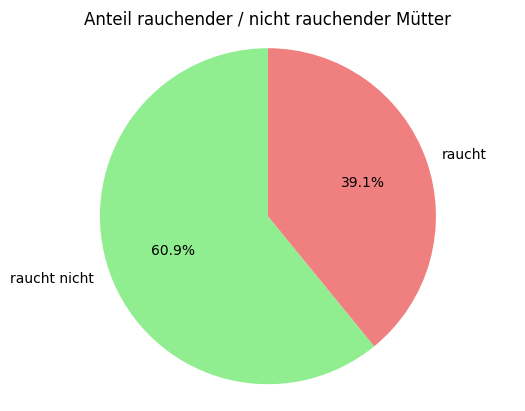

In [4]:
# 4. Wie viele Mütter rauchen (Mutter raucht: 0 = False (trifft nicht zu)) und wie viele nicht? Stelle dies als Kreisdiagramm dar.

df_clean["Mutter raucht"].value_counts() # 0 -> 715 Mütter rauchen nicht; 1 -> 459 Mütter rauchen

import matplotlib.pyplot as plt

# Zähle, wie viele Mütter rauchen (1) oder nicht rauchen (0)

anzahl_1 = df_clean["Mutter raucht"].value_counts()
print(anzahl_1)

# Beschriftung: Reihenfolge muss zur Zählung passen (häufig 0 vor 1)

labels = ["raucht nicht", "raucht"]  

# Farben (optional)

farben = ["lightgreen", "lightcoral"]

# Kreisdiagramm zeichnen

plt.pie(anzahl_1, labels=labels, colors=farben, autopct="%1.1f%%", startangle=90)
plt.title("Anteil rauchender / nicht rauchender Mütter")
plt.axis("equal")  # Macht den Kreis wirklich rund
plt.show()

In [5]:
# 5. Wie viele Erstgebärende (Erstschwangerschaft = 0) gibt es?

anzahl_2 = df_clean["Erstschwangerschaft"].value_counts()
print(anzahl_2) # 866 (Erstschwangerschaft); 308 (Folgeschwangerschaft)

Erstschwangerschaft
0    866
1    308
Name: count, dtype: int64


In [19]:
# 6. Wie ist die Verteilung der Schwangerschaftsdauer? Stelle dies mit einem Histogramm dar. 

maximum_schwangerschaftsdauer = int(round(df_clean["Schwangerschaftsdauer [d]"].max()))
print(f"maximale Schwangerschaftsdauer [d]: {maximum_schwangerschaftsdauer}")

minimum_schwangerschaftsdauer = int(round(df_clean["Schwangerschaftsdauer [d]"].min()))
print(f"minimale Schwangerschaftsdauer [d]: {minimum_schwangerschaftsdauer}")

import plotly.express as px

import numpy as np

# Werte vorbereiten
werte = df_clean["Schwangerschaftsdauer [d]"]

# Anzahl der gewünschten Bins
anzahl_bins = 15

# Höchsten Balkenwert berechnen (y-Achsen-Maximum)
counts, bins = np.histogram(werte, bins=anzahl_bins)
max_count = counts.max()

# Interaktives Histogramm mit Plotly
fig = px.histogram(
    df_clean,
    x="Schwangerschaftsdauer [d]",
    nbins=anzahl_bins,
    title="Verteilung der Schwangerschaftsdauer",
    labels={"Schwangerschaftsdauer [d]": "Tage"},
    color_discrete_sequence=["green"]
)

# Layout: schöner Abstand & Achsentitel
fig.update_layout(
    bargap=0.05,
    xaxis_title="Dauer der Schwangerschaft (Tage)",
    yaxis_title="Anzahl Fälle"
)

# Y-Achse anpassen: Puffer 15 % oben drauf
fig.update_yaxes(
    dtick=40,
    range=[0, max_count * 1.15]
)

fig.show()

maximale Schwangerschaftsdauer [d]: 353
minimale Schwangerschaftsdauer [d]: 148


In [31]:
# 7. Wie ist die Verteilung des Geburtsgewichts? Stelle dies mit einem Histogramm dar. 

maximum_geburtsgewicht = int(round(df_clean["Geburtsgewicht [g]"].max()))
print(f"maximales Geburtsgewichter [g]: {maximum_geburtsgewicht}")

minimum_geburtsgewicht = int(round(df_clean["Geburtsgewicht [g]"].min()))
print(f"maximales Geburtsgewichter [g]: {minimum_geburtsgewicht}")

import plotly.express as px

import numpy as np

# Werte vorbereiten
werte = df_clean["Geburtsgewicht [g]"]

# Anzahl der gewünschten Bins
anzahl_bins = 100

# Höchsten Balkenwert berechnen (y-Achsen-Maximum)
counts, bins = np.histogram(werte, bins=anzahl_bins)
max_count = counts.max()

# Interaktives Histogramm mit Plotly
fig = px.histogram(
    df_clean,
    x="Geburtsgewicht [g]",
    nbins=anzahl_bins,
    title="Verteilung des Geburtsgewichts",
    labels={"Geburtsgewicht [g]": "Gramm"},
    color_discrete_sequence=["cornflowerblue"]
)

# Layout: schöner Abstand & Achsentitel
fig.update_layout(
    bargap=0.05,
    xaxis_title="Geburtsgewicht",
    yaxis_title="Anzahl Fälle"
)

# Y-Achse anpassen: Puffer 15 % oben drauf
fig.update_yaxes(
    dtick=10,
    range=[0, max_count * 1.15]
)

fig.show()

maximales Geburtsgewichter [g]: 4990
maximales Geburtsgewichter [g]: 1559


In [8]:
# 8. Berechne den BMI der Mütter.

# Körpergröße von cm in m umrechnen
groesse_m = df_clean["Körpergröße [cm]"] / 100

# BMI berechnen und neue Spalte anlegen
df_clean["BMI"] = df_clean["Gewicht der Mutter [kg]"] / (groesse_m ** 2)
df_clean["BMI"] = df_clean["BMI"].round(1)
df_clean["BMI"]

durchschnitt_bmi = int(round(df_clean["BMI"].mean()))
print(f"Durchschnittlicher BMI: {durchschnitt_bmi}")

median = int(round(df_clean["BMI"].median()))
print(f"Median: {median}")

df_clean

Durchschnittlicher BMI: 22
Median: 21


,Fall,Geburtsgewicht [g],Schwangerschaftsdauer [d],Erstschwangerschaft,Alter der Mutter in Jahren,Körpergröße [cm],Gewicht der Mutter [kg],Mutter raucht,BMI
0,1,3402,284,0,27,157,45,0,18.3
1,2,3203,282,0,33,163,61,0,23.0
2,3,3629,279,0,28,163,52,1,19.6
4,5,3062,282,0,23,170,57,1,19.7
5,6,3856,286,0,25,157,42,0,17.0
...,...,...,...,...,...,...,...,...,...
1231,1232,3203,275,1,27,152,45,0,19.5
1232,1233,3629,265,0,24,170,54,0,18.7
1233,1234,3685,291,0,30,165,68,1,25.0
1234,1235,3544,281,1,21,165,50,0,18.4


Raucherinnen:        3227 g
Nichtraucherinnen:  3489 g


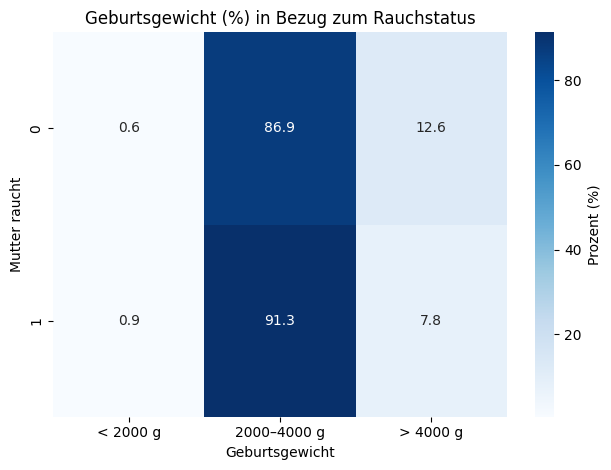

,Mutter raucht,Geburtsgewicht [g]
Mutter raucht,1.000000,-0.246799
Geburtsgewicht [g],-0.246799,1.000000


In [13]:
# 9. Unterscheidet sich das Geburtsgewicht zwischen rauchenden und nicht-rauchenden Müttern?

gewicht_vergleich = df_clean.groupby("Mutter raucht")["Geburtsgewicht [g]"].mean()

print(f"Raucherinnen:        {gewicht_vergleich[1]:.0f} g")
print(f"Nichtraucherinnen:  {gewicht_vergleich[0]:.0f} g")

import plotly.express as px

# Neue Spalte mit sprechendem Gruppennamen für die Achse
df_clean["Rauchergruppe"] = df_clean["Mutter raucht"].map({0: "Nichtraucherinnen", 1: "Raucherinnen"})

fig = px.box(
    df_clean,
    x="Rauchergruppe",
    y="Geburtsgewicht [g]",
    color="Rauchergruppe",
    title="Geburtsgewicht nach Rauchstatus der Mutter",
    color_discrete_sequence=["lightgreen", "lightcoral"],
    points="all"  # zeigt auch einzelne Datenpunkte
)

fig.update_layout(
    xaxis_title="Gruppe",
    yaxis_title="Geburtsgewicht (g)",
    showlegend=False
)

fig.show()

import plotly.express as px

fig = px.histogram(
    df_clean,
    x="Geburtsgewicht [g]",
    color="Rauchergruppe",
    barmode="overlay",
    nbins=30,
    title="Verteilung des Geburtsgewichts (Raucherinnen vs. Nichtraucherinnen)",
    color_discrete_sequence=["lightgreen", "lightcoral"],
    labels={"Gewicht in Gramm": "Geburtsgewicht [g]"}
)

fig.update_traces(opacity=0.6)  # Damit man überlappende Säulen erkennt
fig.update_layout(
    xaxis_title="Geburtsgewicht (g)",
    yaxis_title="Anzahl Babys"
)

fig.show()

# Heatmap

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Beispiel: Geburtsgewicht kategorisieren
# (Grenzen und Beschriftung kannst du anpassen)
bins = [0, 2000, 4000, df_clean["Geburtsgewicht [g]"].max()]
labels = ["< 2000 g", "2000–4000 g", "> 4000 g"]

# Neue Spalte mit Gruppen
df_clean["Geburtsgewicht_Kategorie"] = pd.cut(
    df_clean["Geburtsgewicht [g]"], bins=bins, labels=labels
)

# Kreuztabelle erstellen (relative Häufigkeiten pro Zeile → "index")
kreuz_rel = pd.crosstab(
    df_clean["Mutter raucht"],
    df_clean["Geburtsgewicht_Kategorie"],
    normalize="index"
)

# Werte in Prozent umrechnen
kreuz_percent = kreuz_rel * 100

# Heatmap anzeigen
sns.heatmap(
    kreuz_percent,
    annot=True,          # Prozentwerte in Zellen anzeigen
    fmt=".1f",           # eine Nachkommastelle
    cmap="Blues",
    cbar_kws={'label': 'Prozent (%)'}
)

plt.title("Geburtsgewicht (%) in Bezug zum Rauchstatus")
plt.xlabel("Geburtsgewicht")
plt.ylabel("Mutter raucht")
plt.tight_layout()  # für sauberen Abstand am Rand
plt.show()

# Korrelation

df_clean[["Mutter raucht", "Geburtsgewicht [g]"]].corr()

In [10]:
# 10. Erstelle einen Scatterplot, der Schwangerschaftsdauer (gestation) gegen Geburtsgewicht (bwt) darstellt, und füge den Rauchstatus als Farbdimension hinzu.

import plotly.express as px

# Gruppenspalte für klare Beschriftung (falls noch nicht vorhanden)
df_clean["Rauchergruppe"] = df_clean["Mutter raucht"].map({0: "Nichtraucherinnen", 1: "Raucherinnen"})

# Erstelle Scatterplot mit Trendlinien
fig = px.scatter(
    df_clean,
    x="Schwangerschaftsdauer [d]",
    y="Geburtsgewicht [g]",
    color="Rauchergruppe",                     # Farbdimension nach Rauchstatus
    trendline="ols",                           # ← Lineare Regressionslinie aktivieren
    trendline_scope="group",                   # ← Für jede Gruppe eigene Linie
    title="Schwangerschaftsdauer vs. Geburtsgewicht – mit Trendlinien",
    labels={
        "Dauer der Schwangerschaft in Tagen": "Schwangerschaftsdauer (Tage)",
        "Gewicht in Gramm": "Geburtsgewicht (g)",
        "Rauchergruppe": "Rauchstatus"
    },
    color_discrete_sequence=["lightgreen", "lightcoral"]
)

fig.update_layout(
    legend_title_text="Rauchstatus der Mutter"
)

fig.show()

In [11]:
fig = px.scatter(
    df_clean,
    x="Körpergröße [cm]",
    y="Geburtsgewicht [g]",
    trendline="ols",  # ← Regressionslinie
    title="Geburtsgewicht vs. Körpergröße der Mutter mit Trendlinie",
    labels={
        "Körpergröße [cm]": "Körpergröße der Mutter (cm)",
        "Geburtsgewicht [g]": "Geburtsgewicht (g)"
    },
    color_discrete_sequence=["darkgreen"]
)

fig.show()

fig = px.scatter(
    df_clean,
    x="Schwangerschaftsdauer [d]",
    y="Geburtsgewicht [g]",
    trendline="ols",  # ← Regressionslinie
    title="Geburtsgewicht vs. Schwangerschaftsdauer [d] mit Trendlinie",
    labels={
        "Schwangerschaftsdauer [d]": "Körpergröße der Mutter (cm)",
        "Geburtsgewicht [g]": "Geburtsgewicht (g)"
    },
    color_discrete_sequence=["darkgreen"]
)

fig.show()